In [14]:
#!pip install -U google-generativeai
#!pip install openai==0.28

import google.generativeai as genai
import openai
import requests
import os
from io import BytesIO
from PIL import Image

In [15]:
# https://aistudio.google.com/app/apikey Get an api key
genai.configure(api_key="") # your sekret key gemini

# https://platform.openai.com/api-keys Get an api key
openai.api_key = "" # your sekret key openai

In [16]:
# Make a text from an prompt (gemini)
def generate_text_with_gemini(prompt):
    # Generate content
    model = genai.GenerativeModel('gemini-1.5-flash')
    response = model.generate_content(f"{prompt} resume la respuesta en 100 palabras maximo")

    # Get the response's text
    generated_text = response.candidates[0].content.parts[0].text    

    return generated_text

In [17]:
# Make a prompt
initial_prompt = input("Describe brevemente la idea de tu imagen") #"Describe un castillo medieval en la cima de una montaña."

# Use the function
response_of_function_gemini = generate_text_with_gemini(initial_prompt)

# Output
print(f"Prompt Gemini: {response_of_function_gemini}")

Describe brevemente la idea de tu imagen Describe un castillo medieval en la cima de una montaña.


Prompt Gemini: El castillo medieval se alza imponente en la cima de una montaña, sus torres puntiagudas rozando las nubes.  Las gruesas murallas de piedra, erosionadas por el tiempo, protegen un laberinto de pasillos y habitaciones. Desde sus almenas, se divisa un panorama impresionante del valle.  En su interior, se respira un aire de misterio y de historia.  Las estancias son austeras, con muebles macizos y tapices que narran historias de batallas y reyes.  El castillo, un símbolo de poder y resistencia, vigila el paisaje desde su posición privilegiada. 



In [18]:
# Make an image from an prompt (openai)
def generate_image_with_openai(prompt):
    # Generate image
    image_response = openai.Image.create(
        prompt=prompt,
        n=1,
        size="1024x1024"
    )

    # Get the image URL
    response = image_response['data'][0]['url']
    return response
   

La imagen ha sido descargada y almacenada correctamente en: ./generated_images/ewlr2yInJVfYN9e1WwWbAAdDZ1x5jI3xpUqoG0g%2Bo%3D.png
Prompt utilizado: El castillo medieval se alza imponente en la cima de una montaña, sus torres puntiagudas rozando las nubes.  Las gruesas murallas de piedra, erosionadas por el tiempo, protegen un laberinto de pasillos y habitaciones. Desde sus almenas, se divisa un panorama impresionante del valle.  En su interior, se respira un aire de misterio y de historia.  Las estancias son austeras, con muebles macizos y tapices que narran historias de batallas y reyes.  El castillo, un símbolo de poder y resistencia, vigila el paisaje desde su posición privilegiada. 



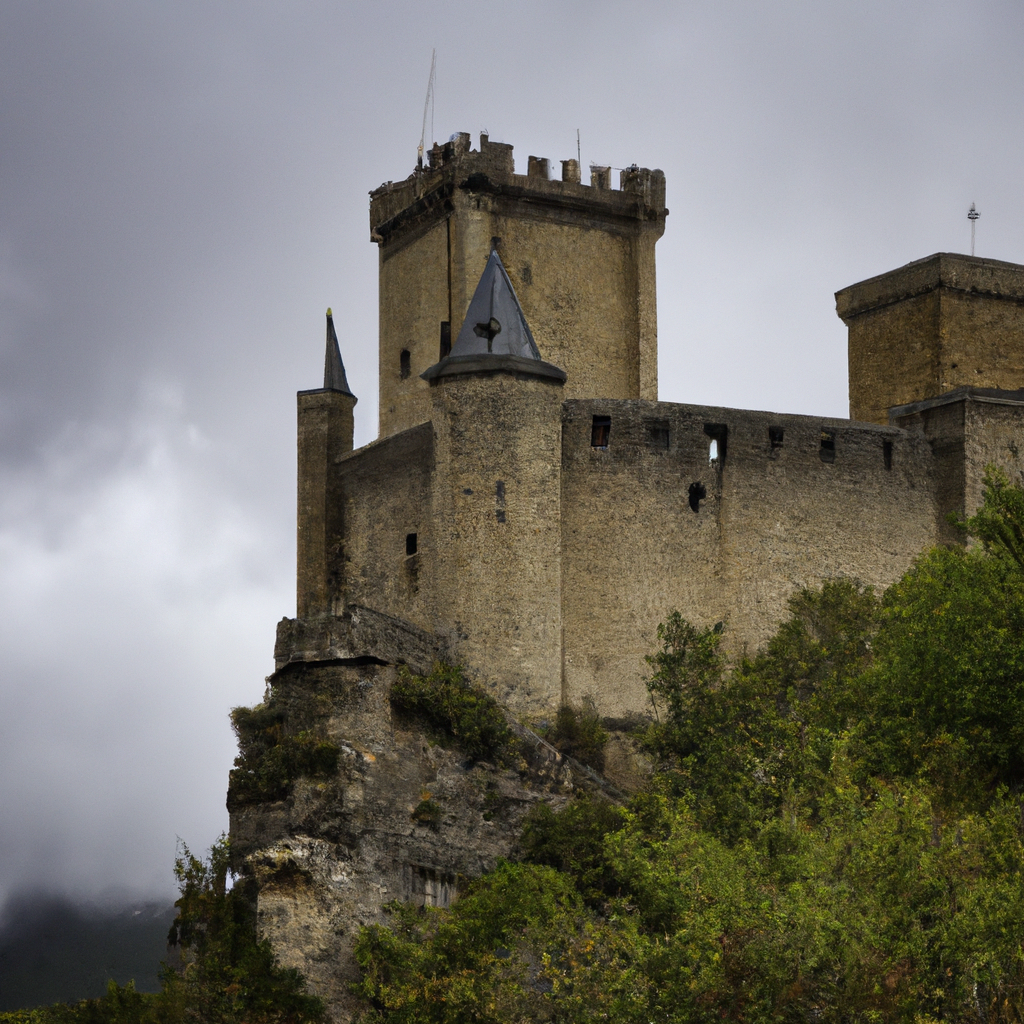

Image's URL OpenAI: https://oaidalleapiprodscus.blob.core.windows.net/private/org-VQyNQRWDgspjldCWllprBfXW/user-S4qyX2ildshTnVDpy87KApyu/img-RZ7SBlLsV8ri5KlcNA1BdZfn.png?st=2024-08-13T21%3A50%3A24Z&se=2024-08-13T23%3A50%3A24Z&sp=r&sv=2023-11-03&sr=b&rscd=inline&rsct=image/png&skoid=d505667d-d6c1-4a0a-bac7-5c84a87759f8&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2024-08-13T22%3A02%3A14Z&ske=2024-08-14T22%3A02%3A14Z&sks=b&skv=2023-11-03&sig=o/ewlr2yInJVfYN9e1WwWbAAdDZ1x5jI3xpUqoG0g%2Bo%3D


In [21]:
# Generate the image with OpenAI
image_url = generate_image_with_openai(response_of_function_gemini)

# Download the image
response = requests.get(image_url)

# Verify if possible to download
if response.status_code == 200:
    # Get filename without extension
    filename = os.path.basename(image_url).split('.')[0]
    # Add the extension ".png"
    filename += ".png"
    
    # Directory to save the image
    directory = "./generated_images/"
    
    # Make directory if it doesn't exist
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    # Complete path
    filepath = os.path.join(directory, filename)
    
    # Save the image
    with open(filepath, 'wb') as f:
        f.write(response.content)
    
    print("La imagen ha sido descargada y almacenada correctamente en:", filepath)
    
    # Display the image using PIL
    img = Image.open(filepath)
    print(f"Prompt utilizado: {response_of_function_gemini}")
    display(img)

else:
    print("Hubo un error al descargar la imagen.")

# Output the image URL
print(f"Image's URL OpenAI: {image_url}")